# FigureItOut Complete EDA

Importing Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

Setting some options

In [2]:
pd.set_option("max_columns",110)
plt.rcParams['figure.figsize'] = 50,50

Reading data files

In [3]:
train = pd.read_csv("./train/train.csv",index_col="unique_id")
test = pd.read_csv("./test/test.csv",index_col="unique_id")

Seperation of data

In [4]:
y = train.targets.values
x = train.drop(["targets"],axis=1).values

## BaseLine Classifier Training

Splitting train set to train and validation set

In [5]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=.20, random_state=0)
for train_index, test_index in sss.split(x, y):
    x_train,x_test,y_train,y_test = x[train_index],x[test_index],y[train_index],y[test_index]

Training and testing the model

In [6]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict_proba(x_test)
log_loss(y_test,y_pred)

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


2.197224577336219

# DataCleaning, EDA and Feature Engg

In [7]:
train_df = train.copy()
test_df = test.copy()

In [8]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,-101.25,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,22026.465795,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,123456,1,0,0,0,0,0,0,0,1,2017,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,-2017,0,0,0,0,0,0,13,0,10,0,1.0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,-101.25,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,22026.465795,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123456,0,0,0,0,0,0,0,0,0,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2017,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,-101.25,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,22026.465795,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,123456,0,0,1,0,0,0,0,0,0,2017,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,-2017,0,0,0,0,0,0,1,0,0,0,1.0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,-101.25,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,22026.465795,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,123456,0,0,1,0,0,0,0,0,1,2017,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,-2017,0,0,0,0,0,0,1,2,2,0,1.0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,-101.25,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,22026.465795,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,123456,0,0,0,0,0,0,0,0,0,2017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-2017,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


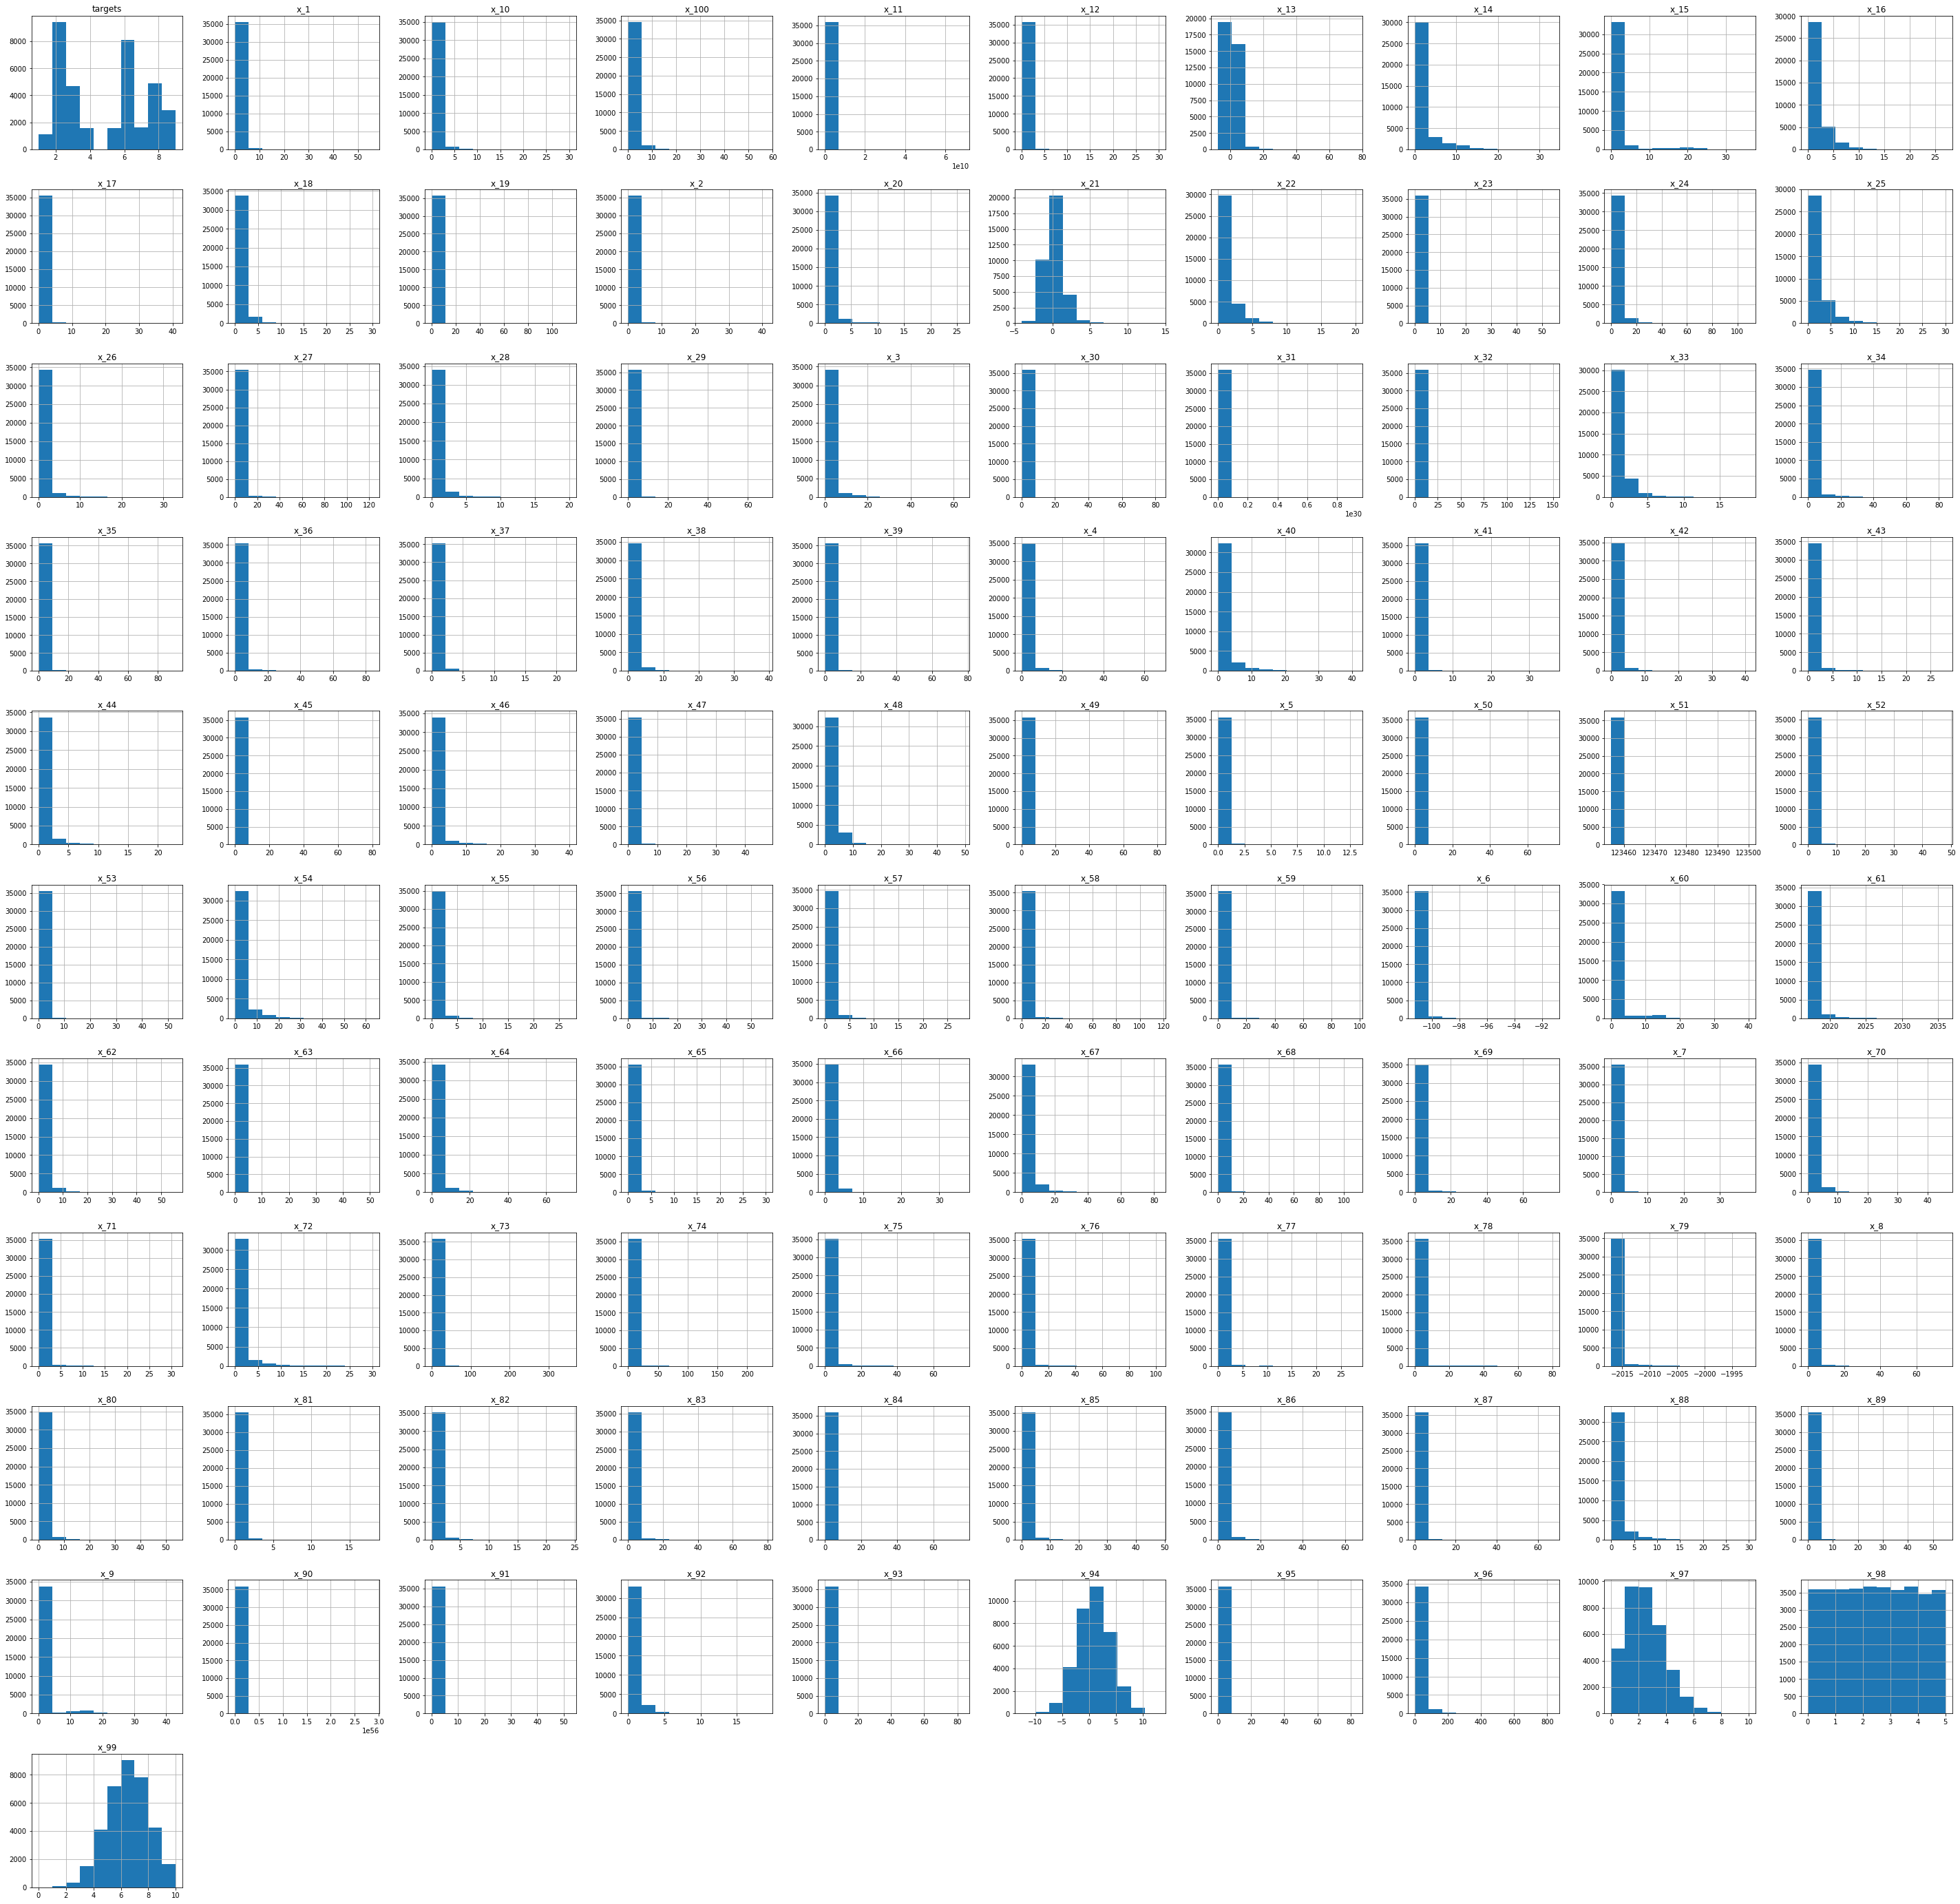

In [9]:
train_df.hist()
plt.show()

We can see some columns have very high values but they are more or less same we can subtract those columns with there smallest value to get the best result

In [10]:
train_df[["x_79"]] = train_df[["x_79"]]+2017
train_df["x_6"] = train_df["x_6"]+101.25
train_df["x_6"] = train_df["x_6"].astype("int64")
train_df[["x_51"]] = train_df[["x_51"]]-123456
train_df[["x_61"]] = train_df[["x_61"]]-2017
test_df[["x_79"]] = test_df[["x_79"]]+2017
test_df["x_6"] = test_df["x_6"]+101.25
test_df["x_6"] = test_df["x_6"].astype("int64")
test_df[["x_51"]] = test_df[["x_51"]]-123456
test_df[["x_61"]] = test_df[["x_61"]]-2017

In [11]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,22026.465795,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,1.0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,0,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,22026.465795,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,0,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,22026.465795,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,0,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,22026.465795,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,1.0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,0,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,22026.465795,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


If we see further we can also convert other colums to int by taking there log

In [13]:
train_df['x_31'] = np.log(train_df['x_31'])
test_df['x_31'] = np.log(test_df['x_31'])
train_df['x_31'] = train_df['x_31'].astype("int64")
test_df["x_31"] = test_df["x_31"].astype("int64")
train_df['x_90'] = np.log(train_df['x_90'])
test_df['x_90'] = np.log(test_df['x_90'])
train_df['x_90'] = train_df['x_90'].astype("int64")
test_df["x_90"] = test_df["x_90"].astype("int64")

In [14]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,0,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,0,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,0,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,0,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


There are some remaning columns with decimal values we can convert them to int by taking floor of them this also keep the same density accros the axis

In [16]:
plt.rcParams.update(plt.rcParamsDefault)

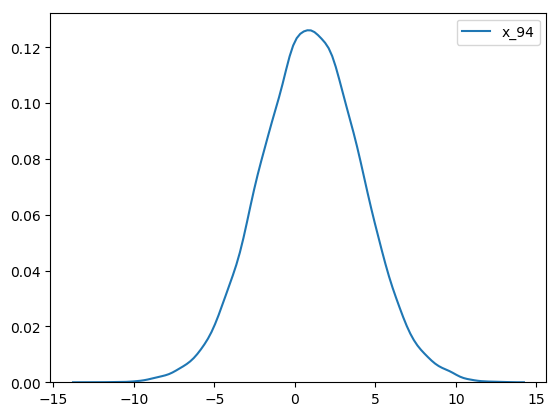

In [17]:
sns.kdeplot(train_df.x_94)

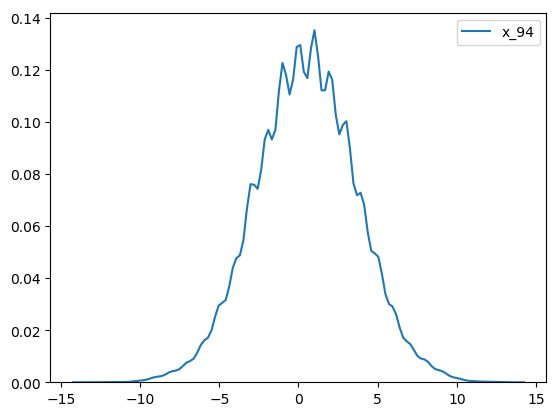

In [18]:
v = train_df.x_94
v = np.floor(v)
sns.kdeplot(v)

In [19]:
train_df.x_94 = train_df.x_94.apply(np.floor).astype("int64")
train_df.x_98 = train_df.x_98.apply(np.floor).astype("int64")
train_df.x_100 = train_df.x_100.apply(np.floor).astype("int64")
train_df.x_11 = train_df.x_11.apply(np.floor).astype("int64")
train_df.x_13 = train_df.x_13.apply(np.floor).astype("int64")
train_df.x_17 = train_df.x_17.apply(np.floor).astype("int64")
train_df.x_21 = train_df.x_21.apply(np.floor).astype("int64")

test_df.x_94 = test_df.x_94.apply(np.floor).astype("int64")
test_df.x_98 = test_df.x_98.apply(np.floor).astype("int64")
test_df.x_100 = test_df.x_100.apply(np.floor).astype("int64")
test_df.x_11 = test_df.x_11.apply(np.floor).astype("int64")
test_df.x_13 = test_df.x_13.apply(np.floor).astype("int64")
test_df.x_17 = test_df.x_17.apply(np.floor).astype("int64")
test_df.x_21 = test_df.x_21.apply(np.floor).astype("int64")

In [20]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,1,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2,0,0.0,0,3,6,1,4
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,3,0,5,1,5
2,0,0,0,0,0,0,0,0,0,0,1,0,-3,3,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,-2,3,0.0,1,1,10,0,9
3,0,0,0,0,0,0,0,0,0,1,0,0,2,13,1,1,-1,0,1,0,0,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5,1,10.0,4,3,7,0,2
4,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,-1,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,0,0,8,1,2


Most of the plots of the columns which contains the negative number are gaussin plots we can use the property of these convert them to positive

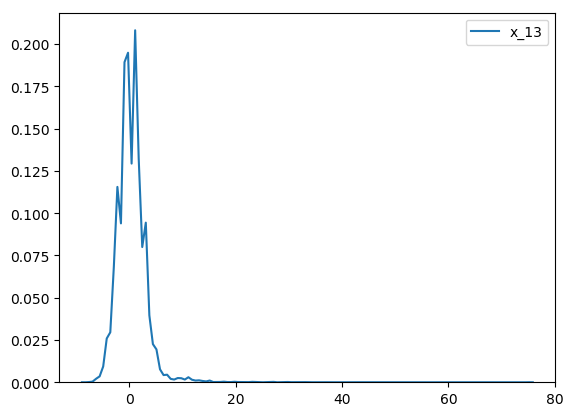

In [21]:
sns.kdeplot(train_df['x_13'])

In [22]:
def negpos(a):
    if(a<0):
        a=-a
    else:
        a=a
    return a

In [23]:
train_df.x_94 = train_df.x_94.apply(negpos)
train_df.x_98 = train_df.x_98.apply(negpos)
train_df.x_100 = train_df.x_100.apply(negpos)
train_df.x_11 = train_df.x_11.apply(negpos)
train_df.x_13 = train_df.x_13.apply(negpos)
train_df.x_17 = train_df.x_17.apply(negpos)
train_df.x_21 = train_df.x_21.apply(negpos)

test_df.x_94 = test_df.x_94.apply(negpos)
test_df.x_98 = test_df.x_98.apply(negpos)
test_df.x_100 = test_df.x_100.apply(negpos)
test_df.x_11 = test_df.x_11.apply(negpos)
test_df.x_13 = test_df.x_13.apply(negpos)
test_df.x_17 = test_df.x_17.apply(negpos)
test_df.x_21 = test_df.x_21.apply(negpos)

In [24]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,1,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2,0,0.0,0,3,6,1,4
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,3,0,5,1,5
2,0,0,0,0,0,0,0,0,0,0,1,0,3,3,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,2,3,0.0,1,1,10,0,9
3,0,0,0,0,0,0,0,0,0,1,0,0,2,13,1,1,1,0,1,0,0,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5,1,10.0,4,3,7,0,2
4,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,0,0,8,1,2


Finally for column 96 we can take log10 convert that to its original value

In [25]:
def log_problem(a):
    if(a<=1):
        return 0
    else:
        return np.log10(a) 
    
train_df.x_96=train_df.x_96.apply(log_problem)
train_df.x_96=np.ceil(train_df.x_96).astype("int64")

test_df.x_96=test_df.x_96.apply(log_problem)
test_df.x_96=np.ceil(test_df.x_96).astype("int64")

In [26]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,1,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2,0,0,0,3,6,1,4
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,0,5,1,5
2,0,0,0,0,0,0,0,0,0,0,1,0,3,3,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,2,3,0,1,1,10,0,9
3,0,0,0,0,0,0,0,0,0,1,0,0,2,13,1,1,1,0,1,0,0,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5,1,1,4,3,7,0,2
4,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,1,2


## Now we can strat modelling as our data is properly scaled

We can also remove outliers for some more accuracy

Splitting data for validation

In [28]:
y_new = train_df.targets.values
x_new = train_df.drop(["targets"],axis=1).values

In [29]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=.20, random_state=0)
for train_index, test_index in sss.split(x, y):
    x_train,x_test,y_train,y_test = x_new[train_index],x_new[test_index],y_new[train_index],y_new[test_index]

### 1. Logistic Regression

In [30]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred = lr.predict_proba(x_test)
log_loss(y_test,y_pred)

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


2.089397588386914

Utility function for file submission

In [33]:
t = pd.read_csv("./test/test.csv")
def filesub(v,y_pred,test):
    a = pd.DataFrame(y_pred,columns=['proba_1', 'proba_2', 'proba_3', 'proba_4', 'proba_5', 'proba_6', 'proba_7', 'proba_8', 'proba_9'])
    a["unique_id"] = test["unique_id"]
    columns=["unique_id",'proba_1', 'proba_2', 'proba_3', 'proba_4', 'proba_5', 'proba_6', 'proba_7', 'proba_8', 'proba_9']
    a = a[columns]
    a.to_csv(v+"_sub.csv",index=False)

In [35]:
lr.fit(x_new,y_new)
y_pred = lr.predict_proba(test_df.values)

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [36]:
filesub("lr_first",y_pred,t)

## Things remaning

1. Differet models can be applied
2. Outliers can be removed
3. More feature engg can be done